In [271]:
import matplotlib.pyplot as plt
import pickle
import cv2
import numpy as np
from PIL import Image
import copy

ff3 = pickle.load(open('Dataset\myo_mask_100.pkl','rb'))
ff3 =  ff3.T

ff4 = pickle.load(open('Dataset\cine_image_100.pkl','rb'))
ff4 =  ff4.T

I = ff3[0]
I8 = (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)

I2 = ff4[0]
I9 = (((I2 - I2.min()) / (I2.max() - I2.min())) * 255.9).astype(np.uint8)



In [291]:
pics = ['predictions/0_predict.png','predictions/1_predict.png','predictions/2_predict.png','predictions/3_predict.png','predictions/4_predict.png','predictions/5_predict.png','predictions/6_predict.png','predictions/7_predict.png','predictions/8_predict.png','predictions/9_predict.png','predictions/10_predict.png','predictions/11_predict.png','predictions/12_predict.png','predictions/13_predict.png','predictions/14_predict.png']

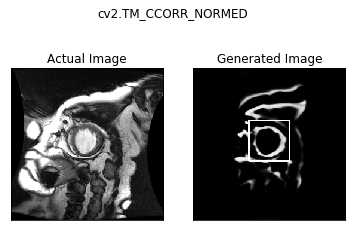

In [324]:
str = pics[11]
img = cv2.imread(str,0)


img2 = copy.copy(img)
template = cv2.imread('template\gg2.PNG',0)
w, h = template.shape[::-1]



methods = ['cv2.TM_CCORR_NORMED']

for meth in methods:
    img = copy.copy(img2)
    method = eval(meth)

    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right,255, 2)

    plt.subplot(121),plt.imshow(cv2.imread('png-test/11.png',0),cmap = 'gray')
    plt.title('Actual Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Generated Image'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

In [326]:
img8 = Image.open(str)
img8 = img8.crop((top_left[0],top_left[1],bottom_right[0],bottom_right[1]))
img8 = np.array(img8)
I = img8
I8 = (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)
fgf = Image.fromarray(I8)
fgf.save('a8.png')

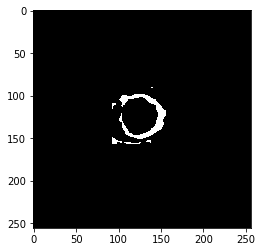

In [327]:
cimg = Image.open('a8.png')
cimg = cimg.convert('1',dither=Image.NONE)


background = Image.open("template\back.png")

background.paste(cimg,(top_left[0],top_left[1],bottom_right[0],bottom_right[1]),cimg)
background.save('over.png',"PNG")

plt.imshow(background)